In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data_dir = "N:\Datasets"

In [3]:
# Change the current working directory to specified path

os.chdir(data_dir)

In [4]:
# Reading csv file

hr_data = pd.read_csv('hr.csv')

In [5]:
# Return top n (5 by default) rows of a data frame or series

hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# isnull () - detect missing values
# isnull().sum() - sums up the missing values in each variable 

hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
# This returns a Series with the data type of each column

hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [8]:
# To see the unique values in a particular column, use unique()
# To convert a series to list, use tolist()

hr_data['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [9]:
# rename() is used to rename any index, column or row or alter axes labels. 

hr_data.rename(columns = {'sales':'dept'},inplace = True)

In [10]:
hr_data['salary'].head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [11]:
# Drop specified labels from rows or columns

# axis = 1 signify drop label from column
# By default, axis = 0 (drop label from index)

X = hr_data.drop('left',axis = 1)

In [12]:
# Target column

y = hr_data['left']

In [13]:
# Predictor Matrix

X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [14]:
# Convert categorical variable into dummy/indicator variables

X = pd.get_dummies(X)

In [15]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Split data into random train and test subsets. Returns List containing train-test split of inputs.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 400)

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Create a Bagging Classifier object

clf = BaggingClassifier(oob_score = True,
                        n_jobs = -1,
                        n_estimators = 20,
                        random_state = 400,
                        base_estimator = DecisionTreeClassifier())

In [21]:
# Build a Bagging ensemble of estimators from the training set

clf.fit(X_train,y_train)

C:\Users\NikSid\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\NikSid\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [22]:
# Score of the training dataset obtained using an out-of-bag estimate. 
# This attribute exists only when oob_score is True.

clf.oob_score_

0.9876656388032335

In [23]:
# Return the mean accuracy on the given test data and labels.

clf.score(X_test,y_test)

0.986

In [24]:
# Looping over to get good number of estimators in the ensemble with OOB score

for w in range(10,300,20):
    clf = BaggingClassifier(oob_score = True,
                            n_jobs = -1,
                            n_estimators = w,
                            random_state = 400,
                            base_estimator = DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob = clf.oob_score_
    print("For n_estimators = "+str(w))
    print('OOB score is '+str(oob))

C:\Users\NikSid\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\NikSid\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9834152846070506
For n_estimators = 30
OOB score is 0.9887490624218684
For n_estimators = 50
OOB score is 0.9894157846487207
For n_estimators = 70
OOB score is 0.9896658054837904
For n_estimators = 90
OOB score is 0.9899991665972164
For n_estimators = 110
OOB score is 0.9899991665972164
For n_estimators = 130
OOB score is 0.9903325277106425
For n_estimators = 150
OOB score is 0.9904992082673556
For n_estimators = 170
OOB score is 0.9902491874322861
For n_estimators = 190
OOB score is 0.9901658471539295
For n_estimators = 210
OOB score is 0.9902491874322861
For n_estimators = 230
OOB score is 0.9902491874322861
For n_estimators = 250
OOB score is 0.9901658471539295
For n_estimators = 270
OOB score is 0.9903325277106425
For n_estimators = 290
OOB score is 0.9902491874322861


In [25]:
#Finalizing on a tree model with 150 trees

clf = BaggingClassifier(oob_score = True,
                        n_jobs = -1,
                        n_estimators = 150,
                        random_state = 400,
                        base_estimator = DecisionTreeClassifier())
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [26]:
# The collection of fitted base estimators.

clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1859118377, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1559503733, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                       

In [27]:
# Printing Base estimator 1

print(clf.estimators_[0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1859118377, splitter='best')


In [28]:
# Return the feature importances of 1st base estimator

print(clf.estimators_[0].feature_importances_)

[5.05185266e-01 1.32251724e-01 1.09587124e-01 7.25383689e-02
 1.56214185e-01 9.76820763e-04 3.25164961e-04 9.23689326e-04
 1.08236025e-03 2.53569257e-03 4.89440705e-04 1.25078175e-03
 8.91752891e-04 8.14953601e-04 2.43254883e-03 2.96508657e-03
 3.16484751e-03 5.68842690e-04 4.96944845e-03 8.31900643e-04]


In [29]:
# We can extract feature importance from each tree then take a mean for all trees

imp = []
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp = np.mean(imp,axis = 0)

In [30]:
# Mapping columns to feature importances

feature_importance = pd.Series(imp,index = X.columns.tolist())

In [31]:
# Sorting feature importances in descending order

feature_importance.sort_values(ascending = False)

satisfaction_level       0.494260
last_evaluation          0.138175
time_spend_company       0.137465
number_project           0.110373
average_montly_hours     0.097373
dept_technical           0.003132
salary_low               0.003084
dept_support             0.002837
dept_sales               0.002542
salary_medium            0.002088
Work_accident            0.001566
dept_IT                  0.001562
dept_accounting          0.001390
salary_high              0.000880
dept_marketing           0.000712
dept_product_mng         0.000667
dept_RandD               0.000642
dept_hr                  0.000590
dept_management          0.000490
promotion_last_5years    0.000174
dtype: float64

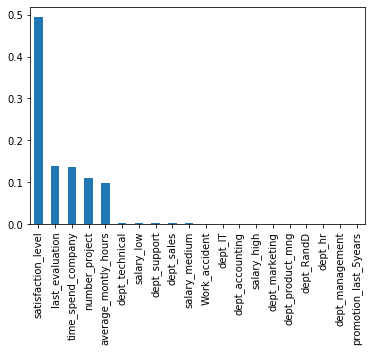

In [32]:
# Plotting a bar chart for feature importances

feature_importance.sort_values(ascending = False).plot(kind = 'bar')